In [1]:
import pandas as pd

In [2]:
file_path = '/Users/harshitgupta/Desktop/vs /VS-Data-Den/data_cleaning/filled_model_dataset.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,PTNR_REGIONAL_MASTER_CD,YEARWEEK,TOTAL_SALES,flag
0,0.0,2019-12-08,28994.45,active
1,0.0,2019-12-15,127699.87,active
2,0.0,2019-12-22,102609.00,active
3,0.0,2019-12-29,NaN,inactive
4,0.0,2020-01-05,NaN,inactive


<Axes: >

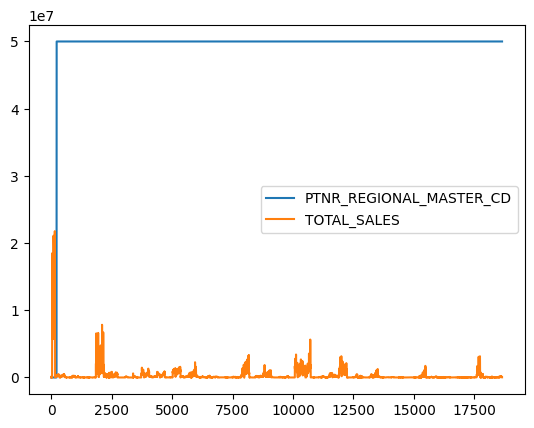

In [5]:
df.plot()

In [6]:
df['PTNR_REGIONAL_MASTER_CD'] = df['PTNR_REGIONAL_MASTER_CD'].astype(str)

<Axes: >

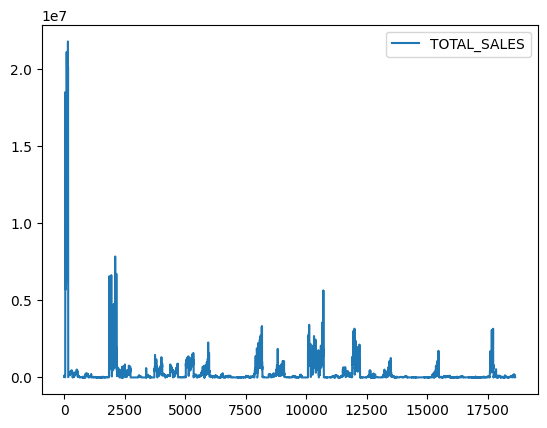

In [7]:
df.plot()

In [8]:
df.head()

,PTNR_REGIONAL_MASTER_CD,YEARWEEK,TOTAL_SALES,flag
0,0.0,2019-12-08,28994.45,active
1,0.0,2019-12-15,127699.87,active
2,0.0,2019-12-22,102609.00,active
3,0.0,2019-12-29,NaN,inactive
4,0.0,2020-01-05,NaN,inactive


In [15]:
df['flag'] = df['flag'].map({'inactive': 0, 'active': 1})

In [16]:
df.head()

,PTNR_REGIONAL_MASTER_CD,YEARWEEK,TOTAL_SALES,flag
0,0.0,2019-12-08,28994.45,1
1,0.0,2019-12-15,127699.87,1
2,0.0,2019-12-22,102609.00,1
3,0.0,2019-12-29,NaN,0
4,0.0,2020-01-05,NaN,0


<Axes: >

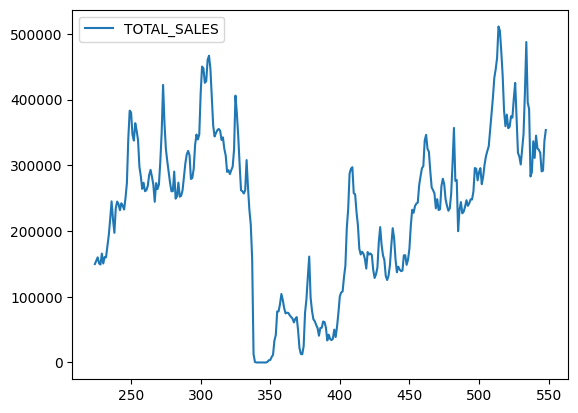

In [17]:
df.query("PTNR_REGIONAL_MASTER_CD== 50000001.0")[["TOTAL_SALES"]].plot()

In [18]:
df_final = df[['YEARWEEK','TOTAL_SALES','flag','PTNR_REGIONAL_MASTER_CD']].rename({'YEARWEEK':'ds','TOTAL_SALES':'y'},axis='columns')

In [19]:
df_final.head()

,ds,y,flag,PTNR_REGIONAL_MASTER_CD
0,2019-12-08,28994.45,1,0.0
1,2019-12-15,127699.87,1,0.0
2,2019-12-22,102609.00,1,0.0
3,2019-12-29,NaN,0,0.0
4,2020-01-05,NaN,0,0.0


In [20]:
from prophet import Prophet

In [21]:
regional_masters = df_final.groupby('PTNR_REGIONAL_MASTER_CD')

In [22]:
regional_masters.head()

,ds,y,flag,PTNR_REGIONAL_MASTER_CD
0,2019-12-08,28994.45,1,0.0
1,2019-12-15,127699.87,1,0.0
2,2019-12-22,102609.00,1,0.0
3,2019-12-29,NaN,0,0.0
4,2020-01-05,NaN,0,0.0
...,...,...,...,...
18625,2023-10-29,17207.29,1,50001297.0
18626,2023-11-05,18710.55,1,50001297.0
18627,2023-11-12,19477.81,1,50001297.0
18628,2023-11-19,24367.62,1,50001297.0


In [23]:
for regional_master in regional_masters.groups:
    group = regional_masters.get_group(regional_master)
    group_sorted = group.sort_values(by='ds')
    

    split_index = int(0.6 * len(group_sorted))  
    
  
    train = group_sorted.iloc[:split_index]
    test = group_sorted.iloc[split_index:]
    
    print(train.shape)

(134, 4)
(195, 4)
(195, 4)
(195, 4)
(195, 4)
(195, 4)
(196, 4)
(141, 4)
(196, 4)
(192, 4)
(195, 4)
(8, 4)
(195, 4)
(195, 4)
(195, 4)
(195, 4)
(195, 4)
(195, 4)
(195, 4)
(196, 4)
(141, 4)
(137, 4)
(195, 4)
(57, 4)
(154, 4)
(195, 4)
(20, 4)
(195, 4)
(20, 4)
(196, 4)
(155, 4)
(195, 4)
(195, 4)
(195, 4)
(195, 4)
(195, 4)
(196, 4)
(196, 4)
(195, 4)
(82, 4)
(195, 4)
(153, 4)
(77, 4)
(196, 4)
(195, 4)
(186, 4)
(195, 4)
(196, 4)
(195, 4)
(195, 4)
(154, 4)
(187, 4)
(76, 4)
(180, 4)
(195, 4)
(99, 4)
(180, 4)
(148, 4)
(177, 4)
(139, 4)
(105, 4)
(147, 4)
(96, 4)
(161, 4)
(97, 4)
(75, 4)
(98, 4)
(68, 4)
(55, 4)
(172, 4)
(57, 4)
(11, 4)


In [24]:
target = pd.DataFrame()

In [34]:
for regional_master, group in regional_masters:
    group_sorted = group.sort_values(by='ds')
    split_index = int(0.6 * len(group_sorted))  
    train = group_sorted.iloc[:split_index]
    test = group_sorted.iloc[split_index:]

    m = Prophet(interval_width=0.95)
    
 
    m.add_regressor('flag')

    m.fit(train)

    future = m.make_future_dataframe(periods=60)

    forecast = m.predict(future)

    m.plot(forecast)

    forecast = forecast.rename(columns={'yhat': f'yhat_{regional_master}'})
    
    target = pd.merge(
        target,
        forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].add_suffix('_' + regional_master),
        how='outer',
        left_index=True,
        right_index=True
    )

10:37:55 - cmdstanpy - INFO - Chain [1] start processing


10:37:55 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Regressor 'flag' missing from dataframe

In [27]:
target

""


In [28]:
target.columns

RangeIndex(start=0, stop=0, step=1)

In [29]:
yhat_columns = [col for col in target.columns if col.startswith('yhat_')]

In [30]:
target = target[yhat_columns]

In [31]:
pd.concat([df_final.set_index('ds').query("PTNR_REGIONAL_MASTER_CD=='0.0'")['y'],target['yhat_0.0']],axis=1).plot()



KeyError: 'yhat_0.0'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_sales(regional_master_cd, train_sales, test_sales, predicted_sales):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sales.index, train_sales.values, label='Train Sales', color='blue')
    plt.plot(test_sales.index, test_sales.values, label='Test Sales', color='green')
    plt.plot(predicted_sales.index, predicted_sales.values, label='Predicted Sales', color='red')
    plt.title(f'Sales Data for Regional Master Code {regional_master_cd}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


In [ ]:
regional_master_cd = '0.0'  

In [ ]:
train_sales = df_final[df_final['PTNR_REGIONAL_MASTER_CD'] == regional_master_cd].set_index('ds').loc[train['ds'], 'y']
test_sales = df_final[df_final['PTNR_REGIONAL_MASTER_CD'] == regional_master_cd].set_index('ds').loc[test['ds'], 'y']

In [ ]:
predicted_sales.reset_index(drop=True, inplace=True)

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x12de20ac0>.

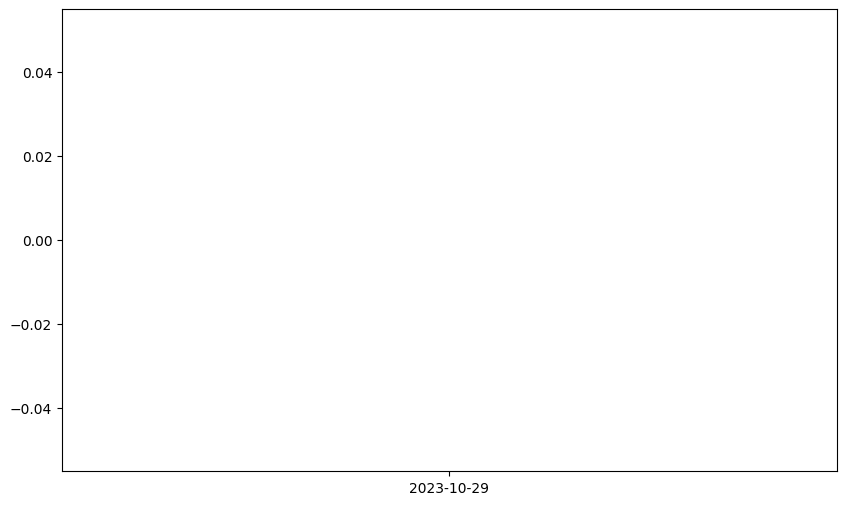

In [ ]:
plot_sales(regional_master_cd, train_sales, test_sales, predicted_sales)